In [ ]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

Epoch 1/5
3937/3937 [==============================] - 537s 136ms/step - loss: 0.2907 - accuracy: 0.8901 - val_loss: 0.6573 - val_accuracy: 0.6609
Epoch 2/5
3937/3937 [==============================] - 524s 133ms/step - loss: 0.1320 - accuracy: 0.9629 - val_loss: 0.6650 - val_accuracy: 0.5975
Epoch 3/5
3937/3937 [==============================] - 522s 133ms/step - loss: 0.0787 - accuracy: 0.9797 - val_loss: 1.0290 - val_accuracy: 0.6152
Epoch 4/5
3937/3937 [==============================] - 519s 132ms/step - loss: 0.0478 - accuracy: 0.9868 - val_loss: 0.4368 - val_accuracy: 0.8644
Epoch 5/5
705/705 [==============================] - 18s 25ms/step - loss: 0.3898 - accuracy: 0.8829
Test Loss: 0.3897998631000519
Test Accuracy: 0.8829400539398193


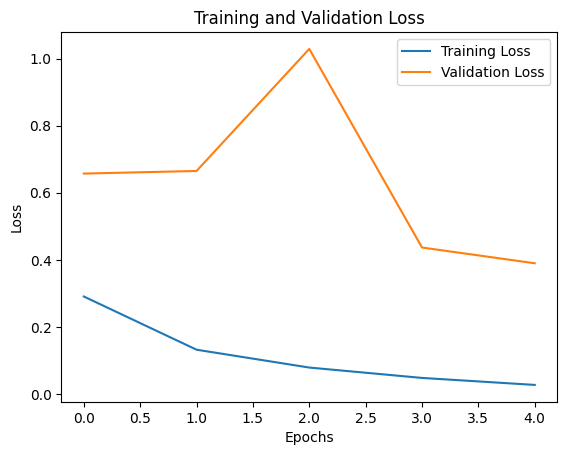

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow import keras
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam


# Convert the target variable into binary classification (0: non-attack, 1: attack)
y = newdf["class"].values
y_test = newdf_test["class"].values

# Create and compile the LSTM model
model = keras.Sequential([
    LSTM(80, input_shape=(x_train_lstm.shape[1], 1), activation='sigmoid', recurrent_activation='hard_sigmoid'),
    Dropout(0.1),
    Dense(1, activation='sigmoid')
])

optimizer = Adam(learning_rate=0.002, epsilon=1e-08)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(x_train_lstm, y, epochs=5, batch_size=32, validation_data=(x_test_lstm, y_test))

# Evaluate the model
test_loss, test_acc = model.evaluate(x_test_lstm, y_test)
print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_acc}')

# Plot the training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
